In [1]:
# Import Dependencies 

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from config import geoapify_key
from datetime import date
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Create Dataframe from the downloaded CSV file in import folder

uber_df = pd.read_csv('import/UberDataset.csv')
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#Look at how many non null rows we have to work with
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# Cleaning data

# filling null purpose
uber_df["PURPOSE"] = uber_df["PURPOSE"].fillna("Miscellaneous")

# getting rid of null cells
uber_df.dropna(inplace = True)

# replacing mispelled values
uber_df = uber_df.replace({"START":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})
uber_df = uber_df.replace({"STOP":{"R?walpindi":"Rawalpindi", "Kar?chi":"Karachi"}})

uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
#Display what type category start date is

uber_df['START_DATE'].dtypes

dtype('O')

In [6]:
#Converting start and end date to a "DateTime format" in the Dataframe

uber_df['day_wk'] = pd.to_datetime(uber_df['START_DATE'])
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00


In [7]:
uber_df['new_days'] = uber_df['day_wk']

In [8]:
#Converting start and end date to what day of the week and add it to our Dataframe

for i in range(len(uber_df)):
    uber_df['new_days'][i] = date.weekday(uber_df['day_wk'][i])

uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2


In [9]:
uber_df['new_days_1'] = uber_df['new_days'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day_wk,new_days,new_days_1
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,4,Friday
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Miscellaneous,2016-01-02 01:25:00,5,Saturday
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,5,Saturday
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,1,Tuesday
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2,Wednesday


In [10]:
# Filled blanks with 'Miscellaneous'. Now we have 1155 non null rows of data

uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   object        
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
 7   day_wk      1155 non-null   datetime64[ns]
 8   new_days    1155 non-null   object        
 9   new_days_1  1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 131.5+ KB


In [11]:
#Output cleaned data into a CSV file in the output folder

uber_df.to_csv("output/cleaned_UberDataset.csv")

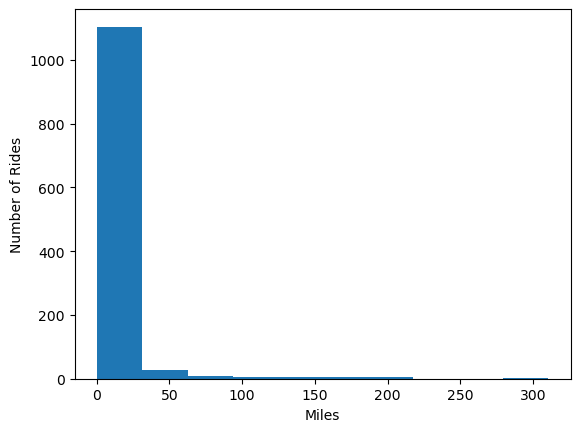

In [12]:
# Data Exploration: Histogram

bins_variable = [0,5,10,15,20,25,30,50,100,150, 250]
plt.hist(uber_df['MILES'])
plt.xlabel('Miles')
plt.ylabel('Number of Rides')
plt.show()

### Analysis:
This histogram above shows us that the majority of trips was taken between 0-25 miles. We wanted to break it down further. See below histogram.

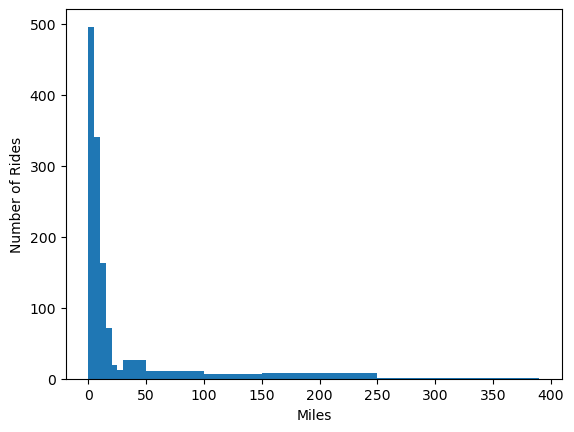

In [13]:
# Increasing the bins for a wider variety of milage driven per ride.

bins_variable = [0,5,10,15,20,25,30,50,100,150, 250, 390]
plt.hist(uber_df['MILES'], bins=bins_variable)
plt.xlabel('Miles')
plt.ylabel('Number of Rides')
plt.show()

### Analysis:

This above histogram shows us that the highest count of rides was in the 0.5-5 miles trip. Most of our dataframe shows that the majority of the trip was between .5 and 25 miles per trip. 

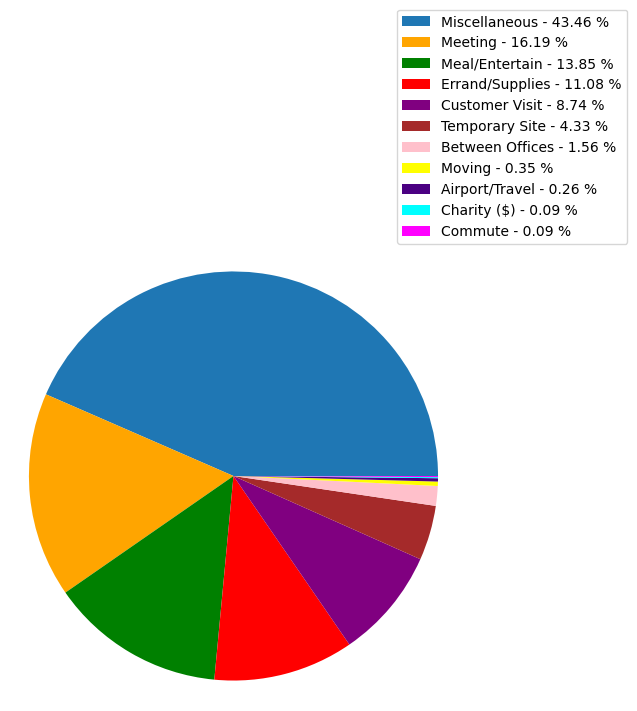

In [14]:
# pie charts, line regression?, box and whisker? strip plot?


# matplotlib
# gathering data from df
purpose_data = uber_df["PURPOSE"].value_counts()

# set variables
sizes = []
labels = []
colors = ["tab:blue", "orange", "green", "red", "purple", "brown", "pink", "yellow", "indigo", "cyan", "magenta"]
percents = []
sum_data = 0

# adding sizes using for loop
for i in range(len(purpose_data)):
    sizes.append(purpose_data[i])
    sum_data += sizes[i]

# new loop to make percents
for i in range(len(sizes)):
    percentage = sizes[i]/sum_data*100
    percents.append(percentage)

# use list() function to get series index for labels
labels = list(purpose_data.index.values)

# adding percentages to labels to show on legend, using list comprehension
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percents)]

# making pie chart
patches, texts = plt.pie(sizes, colors=colors)

# making the legend and formatting it
plt.legend(patches, labels, loc="best", bbox_to_anchor=(0.85, 1))

# formatting display to look nicer
plt.axis('equal')
plt.tight_layout()
# show
plt.show()

### Analysis:
The pie chart above show us that the category of the ride was highest in the "Miscellaneous" at 43.46%.
That was followed by "Meeting" at 16.19%.

In [15]:
# Extract individual groups
group0 = uber_df[uber_df["new_days"] == 0]["day_wk"]
group1 = uber_df[uber_df["new_days"] == 1]["day_wk"]
group2 = uber_df[uber_df["new_days"] == 2]["day_wk"]
group3 = uber_df[uber_df["new_days"] == 3]["day_wk"]
group4 = uber_df[uber_df["new_days"] == 4]["day_wk"]
group5 = uber_df[uber_df["new_days"] == 5]["day_wk"]
group6 = uber_df[uber_df["new_days"] == 6]["day_wk"]


In [16]:
# Perform the ANOVA Statistical test
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.612649417410859, pvalue=0.016089056495715532)

### Analysis:

Our statistical test ANOVA shows the analysis of variance. Showing us the variance of number of rides each day of the week. The null hypothesis was that there is no significant difference in the avg number of trips during the week. The test shows that we can reject the null as the alpha is under .05.

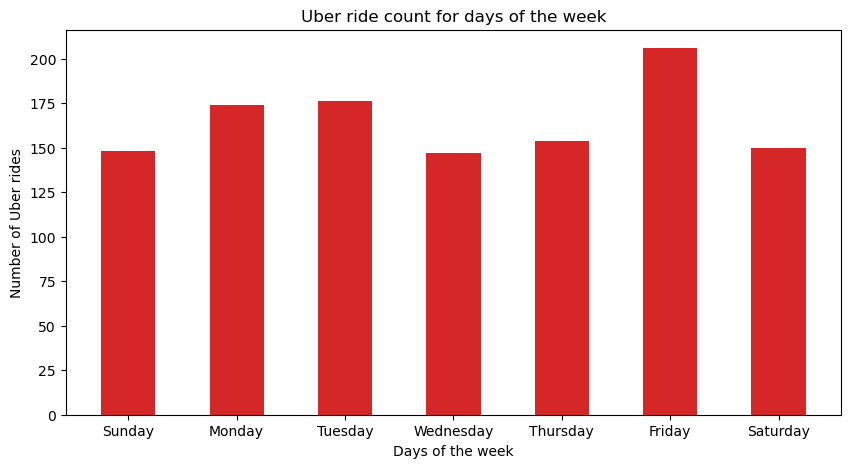

In [17]:
# bar graph for days of the week

# get x and y axis for bar graph
y_axis = list(uber_df["new_days_1"].value_counts())
x_axis = list(uber_df["new_days_1"].value_counts().index)

# set order
day_order = [5,2,1,6,3,0,4]
# put indexes in order for both x and y axis
y_axis = [y_axis[i] for i in day_order]
x_axis = [x_axis[i] for i in day_order]

# days bar graph
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color = "tab:red", width = 0.5, align = "center")
plt.title("Uber ride count for days of the week")
plt.xlabel("Days of the week")
plt.ylabel("Number of Uber rides")
plt.show()

### Analysis:

The above graph shows us the busiest day of the week was Friday. Monday and Tues came in second. The rest of the week days was consistant.

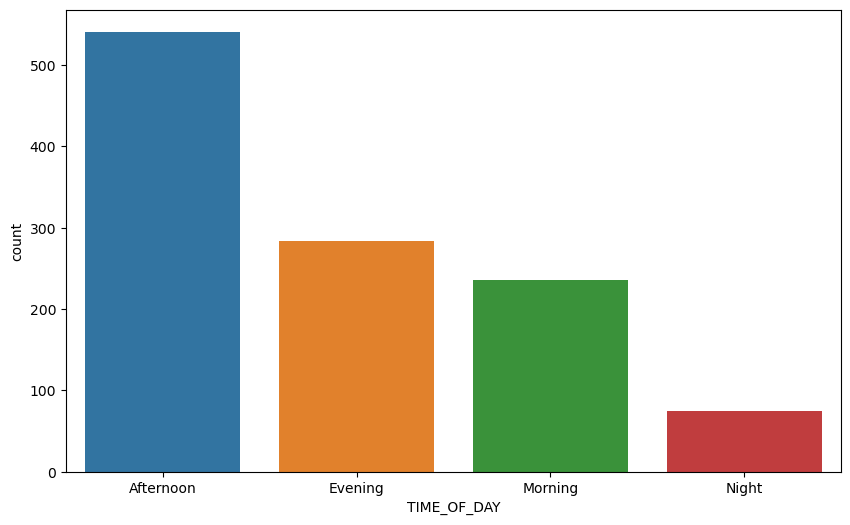

In [18]:
# converting START_DATE and END_DATE into datetime format
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'])
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'])
#create new feature representing time of the ride - morning, afternoon, evening, night
uber_df['TIME_DAY'] = uber_df['START_DATE'].apply(lambda i : i.hour)
uber_df['TIME_OF_DAY'] = uber_df['START_DATE'].apply(lambda i : i.hour)
uber_df['TIME_OF_DAY'] = pd.cut(x = uber_df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)
# Convert 'TIME_OF_DAY' column to categorical data type
uber_df['TIME_OF_DAY'] = uber_df['TIME_OF_DAY'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_df, x='TIME_OF_DAY')
plt.show()

### Analysis:

This above graph shows that the afternoons had the busiest time of day followed by evening. 
The slowest time of day was shown to be Night

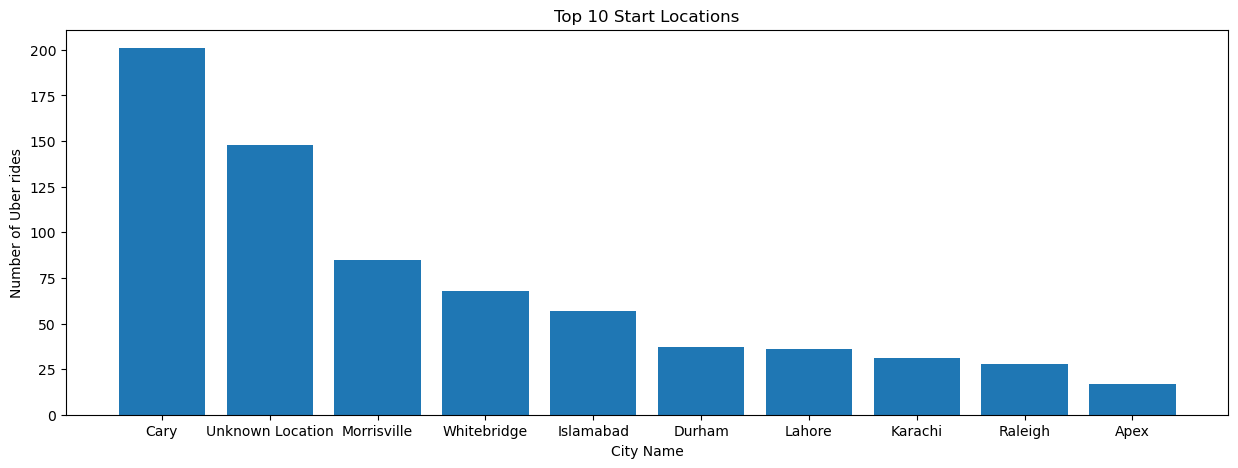

In [19]:
#Create a bar chart with each city in the dataframe and how many rides per city are in the dataframe

axes = uber_df['START'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(15,5))
plt.bar(axes["index"], axes["START"])
plt.title("Top 10 Start Locations")
plt.xlabel("City Name")
plt.ylabel("Number of Uber rides")
plt.show()

### Analysis

This graph shows that Cary, NC had the highest amount of rides in the dataframe. 

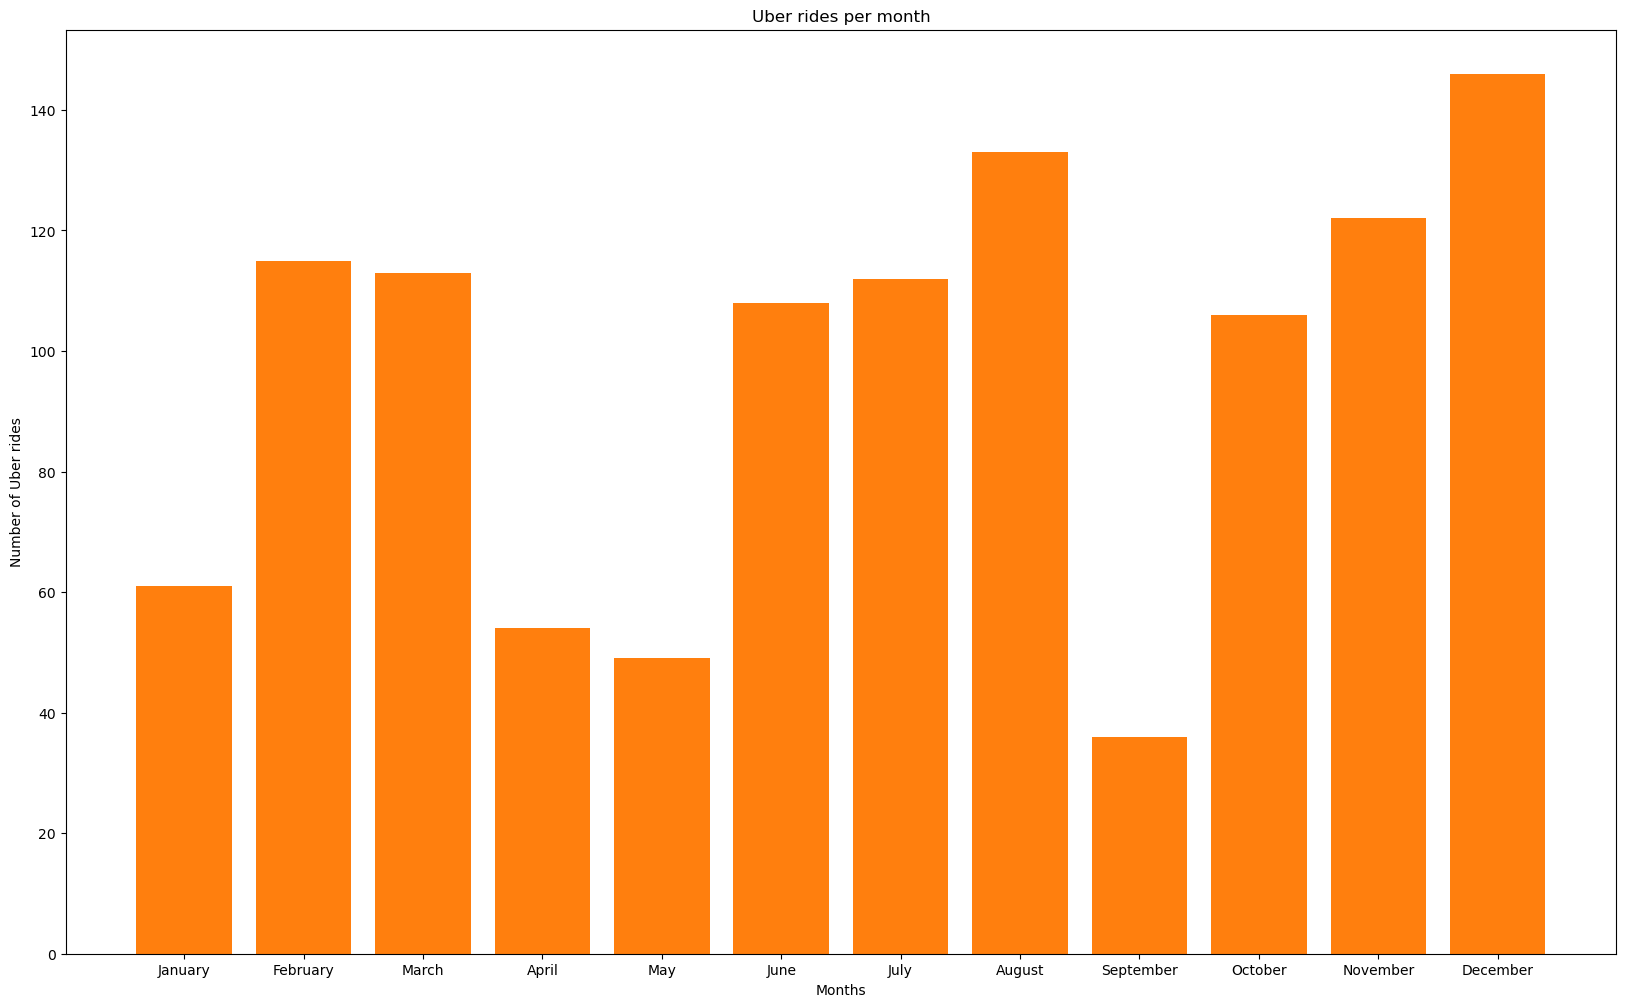

In [20]:
# process data to make stuff easier
uber_df["Start Date"] = pd.to_datetime(uber_df["START_DATE"])
uber_df["End Date"] = pd.to_datetime(uber_df["END_DATE"])


# return months value
uber_df["Month"] = uber_df["Start Date"].apply(lambda i: i.month)
# making months label
month_labels = {1.0:"January",
                2.0:"February",
                3.0:"March",
                4.0:"April",
                5.0:"May",
                6.0:"June",
                7.0: "July",
                8.0:"August",
                9.0:"September",
                10.0:"October",
                11.0:"November",
                12.0:"December"}
# changing months into its name
uber_df["Month"] = uber_df["Month"].map(month_labels)
# x and y axis
x_axis = uber_df["Month"].value_counts().index
y_axis = uber_df["Month"].value_counts()

# put it in order
month_order = [8,3,4,9,10,6,5,1,11,7,2,0]
y_axis = [y_axis[i] for i in month_order]
x_axis = [x_axis[i] for i in month_order]

# bar plot
plt.figure(figsize=(20,12))
plt.bar(x_axis, y_axis, align = "center", color = "tab:orange")
plt.title("Uber rides per month")
plt.xlabel("Months")
plt.ylabel("Number of Uber rides")
plt.show()

### Analysis:
The above graph shows that the most rides happened in the month of December followed by August. The slowest month in this dataframe was September.

In [21]:
# Print this quick DF to show as a table in our slide deck for visuals

axes


,index,START
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
5,Durham,37
6,Lahore,36
7,Karachi,31
8,Raleigh,28
9,Apex,17


### Analysis
The above table shows the numerical data for each city and the number of rides in each city in the dataframe. Cary is the highest with 201.